<a href="https://colab.research.google.com/github/leomos2022/Angelicablogsite.github.io/blob/main/Copy_of_Perceptron_Multicapa_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<h1 align="center">📘 Práctica Individual</h1>
<h2 align="center">Evaluación de Perceptrón Multicapa</h2>

<p align="center"><b>Estudiante:</b> Leonardo Mosquera<br>
<b>Fecha:</b> 12/09/2025</p>
🔍 **Objetivo**  
Verificar el desempeño de los algoritmos de redes neuronales (específicamente el Perceptrón Multicapa) mediante métricas de evaluación apropiadas.


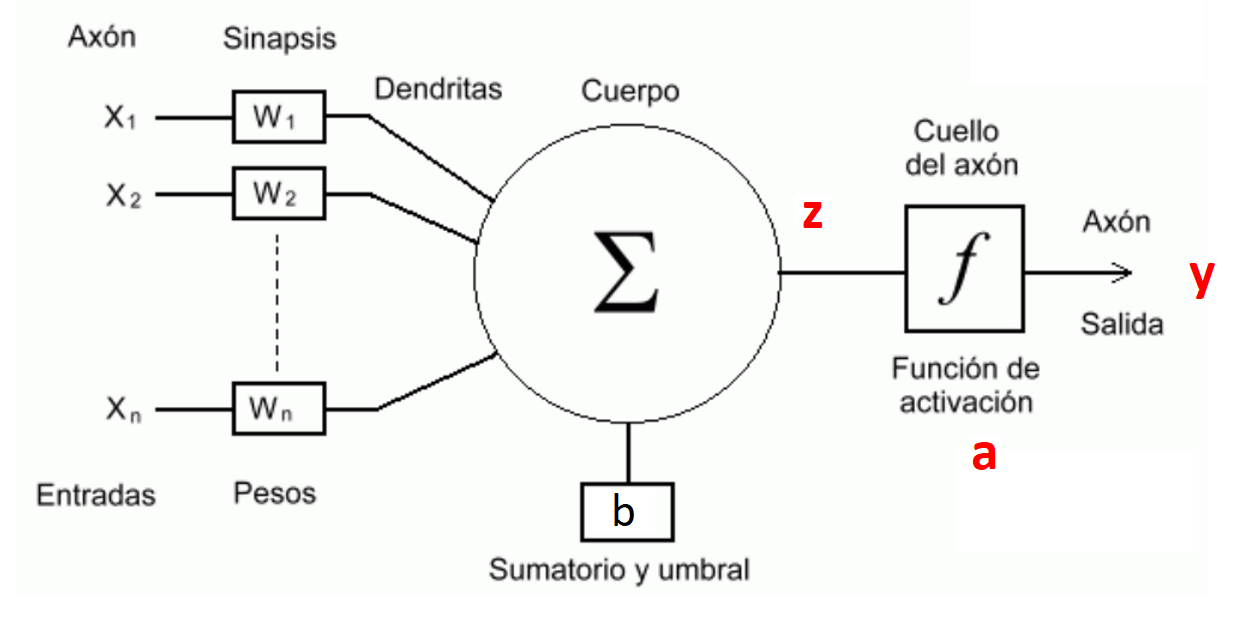

In [ ]:
from IPython.display import Image, display

display(Image(filename="perceptron.png"))


## 📦 1. Importación de Librerías
En esta sección se importan las librerías necesarias para generar datos simulados, procesarlos, construir y evaluar el modelo Perceptrón Multicapa (MLP).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


## 🧪 2. Generación del Dataset
Se crea un conjunto de datos sintético para simular un problema de clasificación binaria.  
Luego se divide en entrenamiento y prueba, y se escalan los datos para mejorar el rendimiento del modelo.


In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=12,
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🧠 3. Implementación del Perceptrón Multicapa
Aquí se construye y entrena el modelo utilizando **MLPClassifier** de *scikit-learn*.  
La red tiene dos capas ocultas (16 y 8 neuronas) con función de activación **ReLU**.


In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# Predicciones
y_pred = mlp.predict(X_test_scaled)
y_proba = mlp.predict_proba(X_test_scaled)[:, 1]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## 📈 4. Evaluación del Modelo
Se presentan las métricas de evaluación que permiten analizar el rendimiento del modelo:
- **Accuracy**  
- **ROC AUC**  
- **Matriz de confusión**  
- **Reporte de clasificación (precision, recall, f1-score)**


In [ ]:
# 📈 4. Evaluación del Modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.945
ROC AUC: 0.9813131313131314

Matriz de Confusión:
 [[100  10]
 [  1  89]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       110
           1       0.90      0.99      0.94        90

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



## 📝 5. Reflexión y Análisis  

**1. ¿En qué consiste el desempeño de un algoritmo de red neuronal como el Perceptrón Multicapa?**  
El desempeño consiste en la capacidad del Perceptrón Multicapa para aprender patrones complejos en los datos y generalizar ese conocimiento para predecir nuevas muestras. A diferencia del perceptrón simple, este puede resolver problemas no lineales gracias a sus capas ocultas y funciones de activación.  

**2. ¿Cuáles son las métricas más importantes para evaluar su desempeño en clasificación binaria?**  
Las métricas más relevantes son la **accuracy** (qué tan bien clasifica en general), la **precisión** (confiabilidad de las predicciones positivas), el **recall** (capacidad de identificar los casos positivos), el **F1-score** (equilibrio entre precisión y recall) y el **ROC AUC** (capacidad de distinguir entre clases bajo diferentes umbrales).  

**3. ¿Qué significa una buena puntuación en ROC AUC? ¿Es mejor que la accuracy?**  
Una puntuación alta en **ROC AUC** (cercana a 1) significa que el modelo diferencia bien entre clases positivas y negativas en distintos escenarios de decisión. Es más robusta que la accuracy cuando hay desbalance de clases, ya que esta última puede dar una impresión equivocada si una clase domina los datos.  

**4. ¿Cómo influye el número de capas ocultas y neuronas en el desempeño del modelo?**  
El número de capas y neuronas determina la complejidad del modelo. Pocas capas pueden limitar su capacidad de aprendizaje, mientras que demasiadas pueden causar sobreajuste y alto costo computacional. La clave está en encontrar un balance que permita al modelo aprender lo suficiente sin perder capacidad de generalización.  


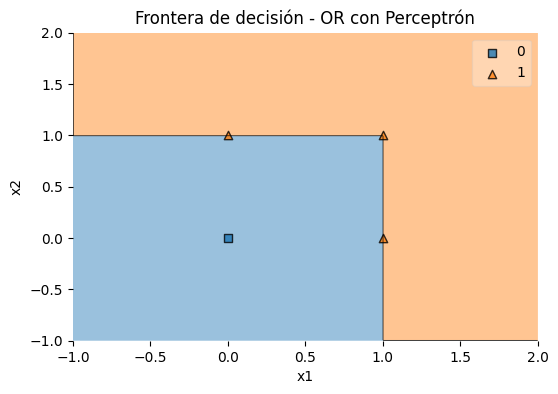

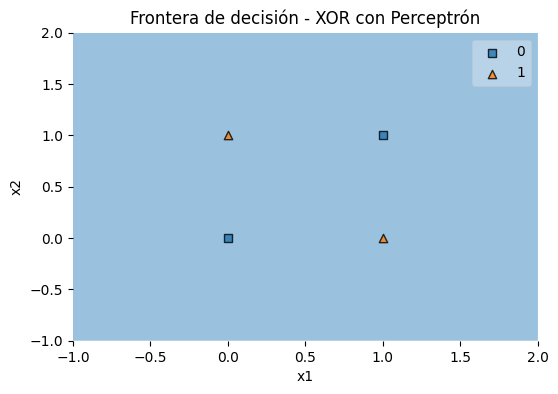

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

# Datos OR
X_or = np.array([[0,0],[0,1],[1,0],[1,1]])
y_or = np.array([0,1,1,1])  # salida OR

# Entrenamos Perceptrón para OR
clf_or = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf_or.fit(X_or, y_or)

# Visualizamos frontera de decisión OR
plt.figure(figsize=(6,4))
plot_decision_regions(X_or, y_or, clf_or)
plt.title("Frontera de decisión - OR con Perceptrón")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Datos XOR
y_xor = np.array([0,1,1,0])  # salida XOR

# Entrenamos Perceptrón para XOR
clf_xor = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf_xor.fit(X_or, y_xor)

# Visualizamos frontera de decisión XOR
plt.figure(figsize=(6,4))
plot_decision_regions(X_or, y_xor, clf_xor)
plt.title("Frontera de decisión - XOR con Perceptrón")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


## ✅ Conclusiones Finales

1. **El Perceptrón simple** es capaz de resolver problemas linealmente separables como el **OR**, pero fracasa en casos no lineales como el **XOR**.  

2. Esto demuestra la **limitación de los modelos lineales** y la necesidad de estructuras más complejas como el **Perceptrón Multicapa (MLP)** para capturar relaciones no lineales.  

3. El uso de **métricas de evaluación** (Accuracy, ROC AUC, matriz de confusión, F1-score) permite valorar de manera integral el rendimiento del modelo, más allá de un único número.  

4. La métrica **ROC AUC** es especialmente útil en problemas de clasificación binaria desbalanceados, ya que mide la capacidad del modelo para distinguir entre clases en diferentes umbrales.  

5. El **número de capas y neuronas ocultas** influye directamente en la capacidad del modelo: más capas aumentan su poder de representación, pero también el riesgo de sobreajuste y mayor costo computacional.  

6. En conclusión, los **modelos neuronales avanzados** como los MLP permiten resolver problemas que los perceptrones simples no pueden, mostrando el avance de la inteligencia artificial en tareas complejas de clasificación.  


## 📚 Referencias

- Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.  

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.  

- Haykin, S. (2009). *Neural Networks and Learning Machines* (3rd ed.). Pearson.  

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, 2825–2830.  

- Shalev-Shwartz, S., & Ben-David, S. (2014). *Understanding Machine Learning: From Theory to Algorithms*. Cambridge University Press.  
